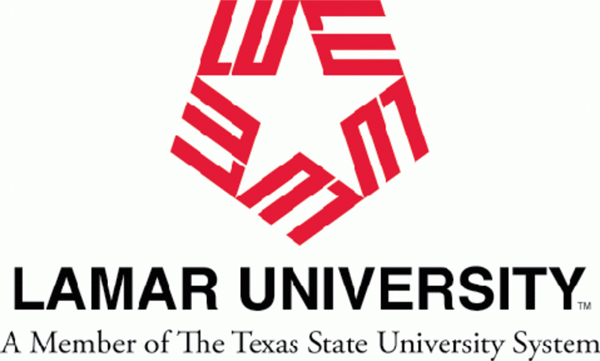

<table border="1" align="center">
	<tr style="background-color:#ADD8E6 ;">
		<td>
			<h1><font color='red'><center>Calculate the cultivated area of Texas </center></font></h1>
		</td>
    </tr>
    <tr style="background-color:#ADD8E6 ;">
        <td>
		<h3><font color='blue'> <center> Vandan B Gadhiya </center> </font></h3>
        <h3><font color='blue'> <center> Saha Sontu </center> </font></h3>
        <h3><font color='blue'> <center> Ibironke Ademola </center> </font></h3>
		</td>
	</tr>    
    </table>

<h2><font color="red"> Problem Statement </font> </h2>

Numerically calculate the cultivated area of Texas state from the IMG file of National land cover Database.

References - TNRIS 
link - https://data.tnris.org/collection?c=97a6ce2e-8a4c-4570-a3ed-983ef1a4554b#4.74/31.32/-100.08

<h2><font color="red"> Code </font> </h2>

In [1]:
#Load Libraries
import gdal
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Open .IMG file by gdal 
file = "C:\\Users\\keyur\\OneDrive\\Desktop\\Vandan\\nlcd_2019_land_cover_l48_20210604_TX.img"
NLC = gdal.Open(file)

In [3]:
#Get the shape of raster file
a = NLC.RasterXSize
b = NLC.RasterYSize
c = (a,b) #shape in terms of (x,y)
print(c)

(44254, 41260)


In [4]:
#Calculate the total pixels of raster file
Total_pixels = a*b
Total_pixels

1825920040

In [5]:
band = NLC.GetRasterBand(1) #Get the band or layer
NLC_array = band.ReadAsArray() #Create a array from raster 
NLC_array #Numpy array

array([[-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       ...,
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128]], dtype=int8)

In [6]:
Min = np.amin(NLC_array)#Get the minimum value of class from array   
Max = np.amax(NLC_array)#Get the maximum value of class from array
(Min, Max)

(-128, 95)

In [7]:
unique, counts = np.unique(NLC_array, return_counts=True) #Derive the unique class values and count it 
z = dict(zip(unique, counts)) #Create a dictionery of class and count
z #Dictionery of class and their count 

{-128: 1056888156,
 0: 25309,
 11: 15573948,
 21: 18541073,
 22: 13047785,
 23: 9949312,
 24: 4068238,
 31: 2544742,
 41: 20376221,
 42: 43194921,
 43: 16010402,
 52: 314749431,
 71: 110764265,
 81: 75432950,
 82: 94867328,
 90: 21397702,
 95: 8488257}

<h2><font color="red"> Results - Cultivated pixels </font> </h2>

In [8]:
#Calculate the total pixels of cultivated classes
Cultivated_class = [81,82]
p = [] 
for i in Cultivated_class:
    for key, value in dict.items(z):
        if key == i:
            p.append(value)
Cultivated_pixels = sum(p)
Cultivated_pixels

170300278

<h2><font color="red"> Results - Cultivated area </font> </h2>

In [9]:
#Calculate the total cultivated area 
Cultivated_area = Cultivated_pixels*30*30
round(Cultivated_area*3.8610*1e-7,2) #sq.miles

59177.64

<h2><font color="red"> Plot - No. of Pixels </font> </h2>

In [10]:
#Remove the unneccesary key values from dictionery
del z[-128] 
del z[0]

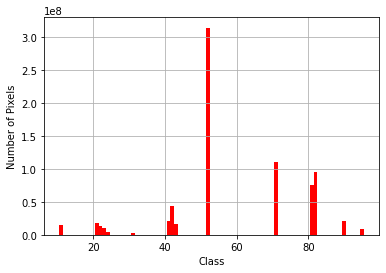

In [11]:
#plot the graph  of total pixels of each class
classes = list(z.keys()) 
pixels = list(z.values())
plt.bar(classes,pixels,color='r',width=1)
plt.xlabel('Class')
plt.ylabel('Number of Pixels')
plt.grid()

<h2><font color="red"> Plot - Area of each class </font> </h2>

In [12]:
#Get the area of each class
area = {key: round(value * (900*3.8610*1e-7),2) for key, value in z.items()}
area #sq.miles

{11: 5411.79,
 21: 6442.84,
 22: 4533.97,
 23: 3457.29,
 24: 1413.67,
 31: 884.27,
 41: 7080.53,
 42: 15009.8,
 43: 5563.45,
 52: 109372.28,
 71: 38489.47,
 81: 26212.2,
 82: 32965.45,
 90: 7435.49,
 95: 2949.58}

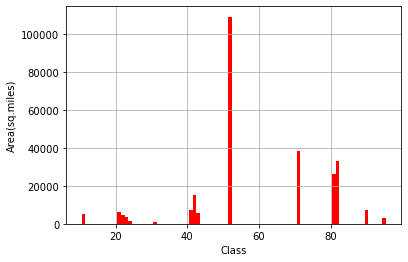

In [13]:
#Plot the graph of area of each class  
classes = list(area.keys()) 
classes_area = list(area.values())
plt.bar(classes,classes_area,color='r',width=1)
plt.xlabel('Class')
plt.ylabel('Area(sq.miles)')
plt.grid()

<h2><font color="red"> Total Area of Texas </font> </h2>

In [14]:
#Total area of texas
area_tx = sum(area.values())
round(area_tx,2) #sq.miles

267222.08

<h2><font color="red"> %Area of each class </font> </h2>

In [15]:
#percentage of each class
area_per = {key: round(value * 100/area_tx,2) for key, value in area.items()}
area_per #(%)

{11: 2.03,
 21: 2.41,
 22: 1.7,
 23: 1.29,
 24: 0.53,
 31: 0.33,
 41: 2.65,
 42: 5.62,
 43: 2.08,
 52: 40.93,
 71: 14.4,
 81: 9.81,
 82: 12.34,
 90: 2.78,
 95: 1.1}

<h2><font color="red"> Plot - %Area of each class </font> </h2>

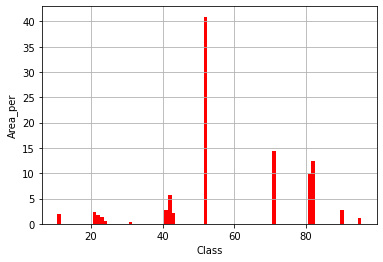

In [16]:
#Plot the graph of area of each class  
classes = list(area_per.keys()) 
classes_area_per = list(area_per.values())
plt.bar(classes,classes_area_per,color='r',width=1)
plt.xlabel('Class')
plt.ylabel('Area_per')
plt.grid()

<h2><font color="red"> Conclusion </font> </h2>